# 취합된 데이터 파일 확인

In [367]:
# 피클 import
import pickle

In [368]:
# pickle 주소위치 확인!! total_df에 저장
with open ("./dacon_total_df_240504_00.pkl", "rb") as file:
    total_df = pickle.load(file)

In [370]:
# total_df.shape

In [3]:
# pd.set_option('display.max_columns', None)
# 필요없는 코드

In [372]:
# total_df.iloc[0]

In [374]:
# 값 확인
# total_df.head(1)

In [376]:
# tmp = total_df.groupby(['Customer_unique_id'])[['order_count', 'Freight_value', 'Price']].sum()
# 필요없는코드

In [378]:
# total_df.columns

In [129]:
# total_df

In [382]:
# day 컬럼 추가
total_df['Order_purchase_day'] = total_df.Order_purchase_timestamp.dt.day

In [383]:
#order_count 재구매여부에 오류가 있어서 수정들어간부
just = total_df.groupby(["Order_purchase_year", "Order_purchase_month","Order_purchase_day","Customer_unique_id","Product_id","Order_id"])["YearMonth"].value_counts().reset_index()

In [384]:
just.head(1)

,Order_purchase_year,Order_purchase_month,Order_purchase_day,Customer_unique_id,Product_id,Order_id,YearMonth,count
0,2017,10,3,CUSTOMER_Unique_06817,PRODUCT_21193,ORDER_86794,201710,1


In [385]:
just.shape

(90193, 8)

In [386]:
total_df.shape

(90193, 46)

In [389]:
# for문 돌리기 위한 unique값
id_list = just['Customer_unique_id'].unique().tolist()

In [390]:
from tqdm import tqdm

In [391]:
for i in tqdm(range(len(id_list))):
    # 임시로 하나씩 변환
    temp1 = just[just.Customer_unique_id==id_list[i]]
    # 같은 Customer_unique_id 일때 날짜가 다르게 산 개수는 몇개야? => number에 넣기
    number =  temp1[~temp1.duplicated(["Order_purchase_year","Order_purchase_year","Order_purchase_month","Order_purchase_day"])].shape[0]
    # 그리고 그 값을 new_count로 정의해서 저장
    just.loc[just.Customer_unique_id == id_list[i], "new_count"] = number

100%|█████████████████████████████████████████████████████████████████████████████| 84130/84130 [19:32<00:00, 71.78it/s]


In [392]:
# new_count가 1초과면 다른날짜에도 구매한 이력이 있다는거니 재구매에 1
just["재구매"] = just.new_count.apply(lambda x : 1 if x>1 else 0)

In [396]:
# just

In [397]:
# 필요없는 컬럼 삭제
just.drop("count",axis=1,inplace=True)

In [398]:
# just[just.Customer_unique_id=="CUSTOMER_Unique_09766"]
# 확인용 예시

In [399]:
total_df.shape

(90193, 46)

In [400]:
just.shape

(90193, 9)

In [401]:
# just.head(1)

In [407]:
just.columns

Index(['Order_purchase_year', 'Order_purchase_month', 'Order_purchase_day',
       'Customer_unique_id', 'Product_id', 'Order_id', 'YearMonth',
       'new_count', '재구매'],
      dtype='object')

In [405]:
total_df.columns

Index(['Order_id', 'Product_id', 'Seller_id', 'Order_purchase_year',
       'Order_purchase_month', 'Review_id', 'Review_score',
       'Review_creation_date', 'Review_answer_timestamp', 'Price',
       'Freight_value', 'Customer_id', 'Order_status',
       'Order_purchase_timestamp', 'Order_delivered_carrier_date',
       'Order_delivered_customer_date', 'Order_estimated_delivery_date',
       'Payment_type', 'Payment_installments', 'Product_category_name',
       'Customer_unique_id', 'Customer_zipcode_prefix', 'Customer_city',
       'Customer_state', 'Seller_zipcode_prefix', 'Seller_city',
       'Seller_state', 'order_count', 'Order_purchase_quarter', '순이익', '매출액',
       'Customer_lat', 'Customer_lng', 'Seller_lat', 'Seller_lng', 'Distance',
       'time_diff_purchase_carrier', 'time_diff_purchase_customer',
       'time_diff_carrier_customer', 'time_diff_customer_delivery',
       'time_diff_purchase_carrier_second',
       'time_diff_purchase_customer_second',
       'time_diff

In [403]:
# total_df와 just의 컬럼 개수가 다르므로 left join으로 머지
# 재구매와 new_count만 추가
merged_df = pd.merge(just, total_df, on=['Order_purchase_year', 'Order_purchase_month', 'Order_purchase_day', 'Customer_unique_id', 'Product_id', 'Order_id', 'YearMonth'], how='left')

In [290]:
# just

In [408]:
merged_df.columns

Index(['Order_purchase_year', 'Order_purchase_month', 'Order_purchase_day',
       'Customer_unique_id', 'Product_id', 'Order_id', 'YearMonth',
       'new_count', '재구매', 'Seller_id', 'Review_id', 'Review_score',
       'Review_creation_date', 'Review_answer_timestamp', 'Price',
       'Freight_value', 'Customer_id', 'Order_status',
       'Order_purchase_timestamp', 'Order_delivered_carrier_date',
       'Order_delivered_customer_date', 'Order_estimated_delivery_date',
       'Payment_type', 'Payment_installments', 'Product_category_name',
       'Customer_zipcode_prefix', 'Customer_city', 'Customer_state',
       'Seller_zipcode_prefix', 'Seller_city', 'Seller_state', 'order_count',
       'Order_purchase_quarter', '순이익', '매출액', 'Customer_lat', 'Customer_lng',
       'Seller_lat', 'Seller_lng', 'Distance', 'time_diff_purchase_carrier',
       'time_diff_purchase_customer', 'time_diff_carrier_customer',
       'time_diff_customer_delivery', 'time_diff_purchase_carrier_second',
       

In [409]:
# just[just.재구매==1]
# 확인용

In [410]:
import pandas as pd

In [734]:
merged_df['Order_purchase_timestamp'] = pd.to_datetime(merged_df['Order_purchase_timestamp'])
# Order_purchase_timestamp 데이트타입변경

KeyError: 'Order_purchase_timestamp'

In [412]:
# 각 고객별 최근 주문 일시를 구합니다.
max_order_timestamps = merged_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('max')
# latest_order_timestamp 열에 각 고객별 최근 주문 일시를 할당합니다.
merged_df['latest_order_timestamp'] = max_order_timestamps

In [413]:
# 각 고객별 첫 주문 일시를 구합니다.
min_order_timestamps = merged_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('min')
# latest_order_timestamp 열에 각 고객별 첫 주문 일시를 할당합니다.
merged_df['first_order_timestamp'] = min_order_timestamps

In [415]:
# merged_df[merged_df.latest_order_timestamp!=merged_df.first_order_timestamp]
# 값 확인용

In [417]:
# merged_df.iloc[0]

In [418]:
# '재구매여부' 열 추가
# 재구매컬럼에 대하여 이 값이 1이면 재구매한거나 Y 아니면 N저장
merged_df['재구매여부'] = merged_df['재구매'].apply(lambda x: 'Y' if x ==1  else 'N')

In [420]:
# merged_df.head(1)

In [421]:
# '구매간격' 열 추가
# latest_order_timestamp  first_order_timestamp 컬럼 데이트타입 변경
merged_df['latest_order_timestamp'] = pd.to_datetime(merged_df['latest_order_timestamp'])
merged_df['first_order_timestamp'] = pd.to_datetime(merged_df['first_order_timestamp'])

# 두 값의 차이를 days로 변경
merged_df['구매간격'] = (merged_df['latest_order_timestamp'] - merged_df['first_order_timestamp']).dt.days

In [423]:
# merged_df["구매간격"].unique()
# 값 출력

In [425]:
# merged_df.iloc[0]
# new_count 다른거구매횟수

In [429]:
# '구매주기' 열 추가
# 만약 new_count의 값이 1이거나(한번만 샀다는거므로) 구매간격이 0이라면 => 한번만 샀거나 그날 산것이므로 구매주기에 0을 저장
# 그게 아닐시 구매간격에서 new_count의 1뺀거를 나눈것이 구매주기 
merged_df['구매주기'] = merged_df.apply\
(lambda row: 0 if (row['new_count'] - 1 == 0) or (row['구매간격'] == 0) else row['구매간격'] / (row['new_count'] - 1), axis=1)

In [431]:
# merged_df.구매주기

In [433]:
# merged_df.구매주기.value_counts()
# 값 확인

In [434]:
merged_df[merged_df['구매주기'] > 0]
# 값확인

,Order_purchase_year,Order_purchase_month,Order_purchase_day,Customer_unique_id,Product_id,Order_id,YearMonth,new_count,재구매,Seller_id,...,time_diff_customer_delivery,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
1,2017,10,3,CUSTOMER_Unique_09766,PRODUCT_13424,ORDER_82627,201710,3.0,1,SELLER_1784,...,0 days 09:57:47,1743443.0,2002643.0,259200.0,35867.0,2019-06-28 11:46:04,2017-10-03 09:44:50,Y,633,316.5
8,2017,10,4,CUSTOMER_Unique_00436,PRODUCT_01434,ORDER_76292,201710,2.0,1,SELLER_1696,...,23 days 00:46:18,2229333.0,2363069.0,133736.0,1989978.0,2018-07-28 09:34:29,2017-10-04 14:49:13,Y,296,296.0
74,2017,10,5,CUSTOMER_Unique_17408,PRODUCT_09474,ORDER_76570,201710,2.0,1,SELLER_1696,...,40 days 07:56:14,444651.0,703851.0,259200.0,3484574.0,2019-03-13 22:28:21,2017-10-05 12:32:55,Y,524,524.0
85,2017,10,5,CUSTOMER_Unique_54276,PRODUCT_16635,ORDER_04066,201710,2.0,1,SELLER_2117,...,28 days 10:32:20,2132204.0,2218604.0,86400.0,2457140.0,2019-05-09 13:49:19,2017-10-05 21:10:56,Y,580,580.0
106,2017,10,6,CUSTOMER_Unique_01788,PRODUCT_04193,ORDER_76576,201710,2.0,1,SELLER_0453,...,42 days 07:38:03,1284503.0,1543703.0,259200.0,3656283.0,2019-06-07 19:03:12,2017-10-06 19:33:34,Y,608,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90047,2019,7,26,CUSTOMER_Unique_01248,PRODUCT_20651,ORDER_35364,201907,2.0,1,SELLER_2283,...,3 days 08:24:05,75768.0,322963.0,247195.0,289445.0,2019-07-26 21:53:12,2019-04-19 06:47:26,Y,98,98.0
90084,2019,7,26,CUSTOMER_Unique_39181,PRODUCT_02009,ORDER_72486,201907,2.0,1,SELLER_1768,...,20 days 06:55:46,5546.0,375100.0,369554.0,1752946.0,2019-07-26 08:52:34,2018-05-16 12:32:35,Y,435,435.0
90085,2019,7,26,CUSTOMER_Unique_39181,PRODUCT_25671,ORDER_72486,201907,2.0,1,SELLER_0449,...,20 days 06:55:46,5546.0,375100.0,369554.0,1752946.0,2019-07-26 08:52:34,2018-05-16 12:32:35,Y,435,435.0
90093,2019,7,26,CUSTOMER_Unique_46789,PRODUCT_05898,ORDER_07516,201907,2.0,1,SELLER_0713,...,23 days 11:53:48,34461.0,383853.0,349392.0,2030028.0,2019-07-26 01:28:39,2019-07-03 17:28:51,Y,22,22.0


In [436]:
# merged_df[merged_df['Customer_unique_id'] == 'CUSTOMER_Unique_85216']
#값 확인

In [732]:
merged_df[merged_df.Customer_unique_id.duplicated()]

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상


In [439]:
# merged_df[merged_df['new_count'] >= 2].sort_values(by='Customer_unique_id')
# 값확인

In [455]:
# Customer_unique_id로 묶어서 order_count Freight_value Price의 합 을 df로 
# 이거 여기서 new_count sum()하는게 맞나?? 바로 아래 CUSTOMER_Unique_00004 예시를 보면 new_count를 쓰면 안된다.
# 왜? 이미 new_count가 Customer_unique_id값으로 group_by한것의 sum()값이므로 
tmp2 = merged_df.groupby(['Customer_unique_id'], as_index=False)[['Freight_value', 'Price']].sum()

In [733]:
merged_df[merged_df.Customer_unique_id=="CUSTOMER_Unique_00012"]

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상


In [459]:
# merged_df.shape[0]
# for문 돌릴 로우개수

In [478]:
# 유니크값이 1개인가를 확인해보자
# len(merged_df[merged_df.Customer_unique_id=="CUSTOMER_Unique_00012"]["new_count"].unique())
# 확인용 전부다 len길이가 1이어야만한다. 1이 아닌게 있다는건 전처리 과정에서 오류가 있었다는것
# 즉 같은 Customer_unique_id에서 new_count 다른게 존재한다는것...
unique_list=[]

In [480]:
# 안돌려도 되는코드
for i in tqdm(range(len(id_list))):
    # Customer_unique_id에 merge_df에서의 new_count값을 넣는다
    # tmp2.loc[tmp2.Customer_unique_id==id_list[i] , "new_count"] = merged_df[merged_df.Customer_unique_id==id_list[i]]["new_count"].unique()
    unique_list.append(len(merged_df[merged_df.Customer_unique_id==id_list[i]]["new_count"].unique()))

100%|████████████████████████████████████████████████████████████████████████████| 84130/84130 [09:34<00:00, 146.39it/s]


In [484]:
# 다행이 1이 나왔이제 값 이전...
unique_values = list(set(unique_list))
print(unique_values) 

[1]


In [485]:
for i in tqdm(range(len(id_list))):
    # Customer_unique_id에 merge_df에서의 new_count값을 넣는다
    tmp2.loc[tmp2.Customer_unique_id==id_list[i] , "new_count"] = merged_df[merged_df.Customer_unique_id==id_list[i]]["new_count"].unique()

100%|█████████████████████████████████████████████████████████████████████████████| 84130/84130 [18:48<00:00, 74.52it/s]


In [490]:
with open("./merged_df.pkl", "wb") as file:
    pickle.dump(merged_df, file)

In [491]:
with open("./tmp2.pkl", "wb") as file:
    pickle.dump(tmp2, file)

In [661]:
merged_df[merged_df.Customer_unique_id=="CUSTOMER_Unique_00004"]

,Order_purchase_year,Order_purchase_month,Order_purchase_day,Customer_unique_id,Product_id,Order_id,YearMonth,new_count,재구매,Seller_id,...,time_diff_customer_delivery,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
24651,2018,9,14,CUSTOMER_Unique_00004,PRODUCT_24575,ORDER_61678,201809,2.0,1,SELLER_2293,...,5 days 06:27:17,357189.0,1207092.0,849903.0,455237.0,2018-10-15 12:44:13,2018-09-14 18:14:31,Y,30,30.0
29080,2018,10,15,CUSTOMER_Unique_00004,PRODUCT_23082,ORDER_84093,201810,2.0,1,SELLER_0807,...,13 days 06:59:56,199281.0,879351.0,680070.0,1148396.0,2018-10-15 12:44:13,2018-09-14 18:14:31,Y,30,30.0


In [492]:
len(id_list)
# tmp2.shape의 로우개수가 같으니 for문돌린다=>돌림

84130

In [463]:
tmp2.shape

(84130, 3)

In [493]:
# tmp2.head(20)
# 값 확인

In [494]:
#tmp3 = total_df.groupby(['Customer_unique_id'])[['재구매여부', '구매주기']]
# tatal-df에서 컬럼 3개 추출해서 새로운 df로
tmp3 = merged_df[['Customer_unique_id','재구매여부', '구매주기']]

In [496]:
# tmp3.head
# 값 확인

In [497]:
# 위에서 뽑은 tmp2 tmp3를 Customer_unique_id 기준으로 left join
reorder = pd.merge(tmp2, tmp3, on='Customer_unique_id', how='left')
reorder

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기
0,CUSTOMER_Unique_00000,21.88,124.99,1.0,N,0.0
1,CUSTOMER_Unique_00001,46.48,289.00,1.0,N,0.0
2,CUSTOMER_Unique_00002,17.79,139.94,1.0,N,0.0
3,CUSTOMER_Unique_00003,23.36,149.94,1.0,N,0.0
4,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0
...,...,...,...,...,...,...
90188,CUSTOMER_Unique_85234,13.88,74.90,1.0,N,0.0
90189,CUSTOMER_Unique_85235,14.16,114.90,1.0,N,0.0
90190,CUSTOMER_Unique_85236,19.04,37.00,1.0,N,0.0
90191,CUSTOMER_Unique_85237,22.07,689.00,1.0,N,0.0


In [660]:
# reorder[reorder.Customer_unique_id=="CUSTOMER_Unique_00004"]

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기
4,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0
5,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0


In [500]:
# 다시 재구매여부를 기준으로 sum출력
temp = reorder.groupby(['재구매여부'], as_index=False)[['new_count', 'Freight_value', 'Price']].sum()

# 재구여부를 기준으로 Customer_unique_id 개수새기
temp2 = reorder.groupby(['재구매여부'], as_index=False)[['Customer_unique_id']].count()

# merge하기 재구매여부를 기준
reorder_yn = pd.merge(temp,temp2, on='재구매여부', how='inner')
reorder_yn 

,재구매여부,new_count,Freight_value,Price,Customer_unique_id
0,N,86176.0,1878698.77,11478684.62,86176
1,Y,8941.0,189716.34,1060169.15,4017


In [501]:
# 재구매여부에 따른 차지하는 비율 컬럼 생성
reorder_yn["재구매여부_ratio"] = reorder_yn["Customer_unique_id"] / reorder_yn["Customer_unique_id"].sum()

In [502]:
reorder_yn
# 값 확인

,재구매여부,new_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio
0,N,86176.0,1878698.77,11478684.62,86176,0.955462
1,Y,8941.0,189716.34,1060169.15,4017,0.044538


In [503]:
temp
# 값 확인

,재구매여부,new_count,Freight_value,Price
0,N,86176.0,1878698.77,11478684.62
1,Y,8941.0,189716.34,1060169.15


In [504]:
# 운임비와 순수익을 더해서 매출액 컬럼 생성
reorder_yn['Payment_value'] = reorder_yn['Freight_value'] + reorder_yn['Price']

In [505]:
reorder_yn

,재구매여부,new_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value
0,N,86176.0,1878698.77,11478684.62,86176,0.955462,13357383.39
1,Y,8941.0,189716.34,1060169.15,4017,0.044538,1249885.49


In [506]:
# 위의 표를 참고!
reorder_yn['구매당순이익'] = round(reorder_yn['Price'] / reorder_yn['new_count'], 2)
reorder_yn['구매당운송비'] = round(reorder_yn['Freight_value'] / reorder_yn['new_count'], 2)
reorder_yn['고객당순이익'] = round(reorder_yn['Price'] / reorder_yn['Customer_unique_id'], 0)
reorder_yn['고객당구매수'] = round(reorder_yn['new_count'] / reorder_yn['Customer_unique_id'], 2)
reorder_yn['고객당매출액'] = round(reorder_yn['Payment_value'] / reorder_yn['Customer_unique_id'], 0)

In [507]:
reorder_yn

,재구매여부,new_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,86176.0,1878698.77,11478684.62,86176,0.955462,13357383.39,133.20,21.80,133.0,1.00,155.0
1,Y,8941.0,189716.34,1060169.15,4017,0.044538,1249885.49,118.57,21.22,264.0,2.23,311.0


In [523]:
reorder_yn.Customer_unique_id.sum()

90193

In [524]:
reorder.shape

(90193, 6)

In [514]:
# reorder

In [548]:
# 구매주기가 0 초과인 애들 생성
reorder_filtered = reorder[reorder['구매주기'] > 0]

In [549]:
reorder_filtered.shape

(3976, 6)

In [550]:
# 재구매가 없는 고객 그리고 구매주기가 0인 고객
reorder_filtered_zero =  reorder[(reorder['구매주기'] == 0)]

In [551]:
# reorder_filtered_zero1 =  reorder[(reorder['구매주기'] ==0)]
# 값이 다른이유는 우리는 일단위로 계산했기에 아래처럼 구매간격이 하루가 안넘으면 무조건 구매주기가 0이지만 재구매한케이스로 간주함 다르므로

In [540]:
merged_df[merged_df.Customer_unique_id=="CUSTOMER_Unique_01223"]

,Order_purchase_year,Order_purchase_month,Order_purchase_day,Customer_unique_id,Product_id,Order_id,YearMonth,new_count,재구매,Seller_id,...,time_diff_customer_delivery,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
35706,2018,11,24,CUSTOMER_Unique_01223,PRODUCT_05244,ORDER_31451,201811,2.0,1,SELLER_0783,...,12 days 05:45:57,254277.0,1211707.0,957430.0,1057557.0,2018-11-25 00:16:56,2018-11-24 17:38:56,Y,0,0.0
36890,2018,11,25,CUSTOMER_Unique_01223,PRODUCT_11256,ORDER_12846,201811,2.0,1,SELLER_0530,...,18 days 05:11:09,236093.0,585115.0,349022.0,1573869.0,2018-11-25 00:16:56,2018-11-24 17:38:56,Y,0,0.0


In [545]:
# reorder[(reorder['구매주기'] == 0) & (reorder.재구매여부=="Y")]

In [552]:
reorder_filtered.shape
# 모양보기

(3976, 6)

In [553]:
reorder_filtered_zero.shape

(86217, 6)

In [554]:
reorder_filtered_zero.shape[0] + reorder_filtered.shape[0]
# 의미없는 코드

90193

In [522]:
# total_df.shape

In [555]:
reorder_filtered_zero

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기
0,CUSTOMER_Unique_00000,21.88,124.99,1.0,N,0.0
1,CUSTOMER_Unique_00001,46.48,289.00,1.0,N,0.0
2,CUSTOMER_Unique_00002,17.79,139.94,1.0,N,0.0
3,CUSTOMER_Unique_00003,23.36,149.94,1.0,N,0.0
6,CUSTOMER_Unique_00005,7.78,14.99,1.0,N,0.0
...,...,...,...,...,...,...
90188,CUSTOMER_Unique_85234,13.88,74.90,1.0,N,0.0
90189,CUSTOMER_Unique_85235,14.16,114.90,1.0,N,0.0
90190,CUSTOMER_Unique_85236,19.04,37.00,1.0,N,0.0
90191,CUSTOMER_Unique_85237,22.07,689.00,1.0,N,0.0


In [573]:
reorder_filtered_zero.shape

(86217, 6)

In [654]:
with open("./reorder_filtered_zero.pkl", "wb") as file:
    pickle.dump(reorder_filtered_zero, file)
#중간 피클파일추출

In [655]:
# 중복값 출력되는지 확인
# 중복행 안뽑기위해서 replace=False로 그래도 실패했으므로 
count=0
for i in range(100):
    sample_df = reorder_filtered_zero.sample(frac=0.1, random_state=None,replace=False)
    # print(sample_df)
    if (sample_df.shape[0] == sample_df.duplicated().shape[0]):
        count=count+1
print(count)

100


In [664]:
# reorder_filtered_zero 중복행처리하기
reorder_filtered_zero1 = reorder_filtered_zero.drop_duplicates()

In [658]:
reorder_filtered_zero.shape

(86217, 6)

In [657]:
reorder_filtered_zero1.shape

(82391, 6)

In [640]:
# reorder_filtered_zero.shape

In [665]:
sample_df = reorder_filtered_zero1.sample(frac=0.1, random_state=None,replace=False)

In [666]:
sample_df.shape

(8239, 6)

In [668]:
# sample_df[sample_df.Customer_unique_id=="CUSTOMER_Unique_49626"]

In [667]:
sample_df[sample_df.duplicated()]

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기


In [669]:
# 재구매를 하지 않는 고객에서 랜덤으로 매번 10퍼씩 뽑는
# sample_df = reorder_filtered_zero.sample(frac=0.1, random_state=None)
# print(sample_df)
# sample_df.duplicated().shape[0]

In [670]:
sample_df

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기
89279,CUSTOMER_Unique_84351,34.38,82.99,1.0,N,0.0
20715,CUSTOMER_Unique_18998,34.35,78.00,1.0,N,0.0
54262,CUSTOMER_Unique_50599,20.10,174.90,1.0,N,0.0
46664,CUSTOMER_Unique_43368,25.74,129.00,1.0,N,0.0
40982,CUSTOMER_Unique_38012,50.62,899.00,1.0,N,0.0
...,...,...,...,...,...,...
36782,CUSTOMER_Unique_34062,15.10,27.90,1.0,N,0.0
85313,CUSTOMER_Unique_80481,20.35,158.00,1.0,N,0.0
79113,CUSTOMER_Unique_74452,11.85,48.90,1.0,N,0.0
66758,CUSTOMER_Unique_62544,23.34,108.90,1.0,N,0.0


In [671]:
reorder_filtered

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기,구매주기_구간
4,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0,29일 이상
5,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0,29일 이상
14,CUSTOMER_Unique_00012,32.53,248.97,2.0,Y,90.0,29일 이상
15,CUSTOMER_Unique_00012,32.53,248.97,2.0,Y,90.0,29일 이상
32,CUSTOMER_Unique_00030,38.85,74.98,2.0,Y,43.0,29일 이상
...,...,...,...,...,...,...,...
87719,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
87720,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
87721,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
88848,CUSTOMER_Unique_83936,30.52,114.90,2.0,Y,89.0,29일 이상


In [672]:
reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \
                    bins=[-float('inf'), 7, 14, 21, 28, float('inf')], \
                    labels=['7일 이내', '14일 이내', '21일 이내', '28일 이내', '29일 이상'], right=False)
# ~7일 미만, ~14일 미만 ~21일 미만 ~28일 미만 ~29이상

/tmp/ipykernel_96/3114017426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \


In [673]:
# reorder_filtered.head(20)
# 값 확인

In [674]:
# 이상치를 제거하기 이ㅜ해서 컬럼 unique 리스트화
reorder_구매주기_구간_list = reorder_filtered.구매주기_구간.unique().tolist()

In [675]:
reorder_구매주기_구간_list

['29일 이상', '28일 이내', '21일 이내', '14일 이내', '7일 이내']

In [676]:
import numpy as np

In [677]:
reorder_filtered.shape

(3976, 7)

In [678]:
# 구매주기 구간에 있는 이상치를 제거하기
def remove_outliers(df, column):
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 구매주기 구간별로 이상치 제거
reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)

/tmp/ipykernel_96/3379321410.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)
/tmp/ipykernel_96/3379321410.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)


In [679]:
reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)

/tmp/ipykernel_96/4224174011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)
/tmp/ipykernel_96/4224174011.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)


<Axes: xlabel='구매주기_구간', ylabel='Price'>

/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 

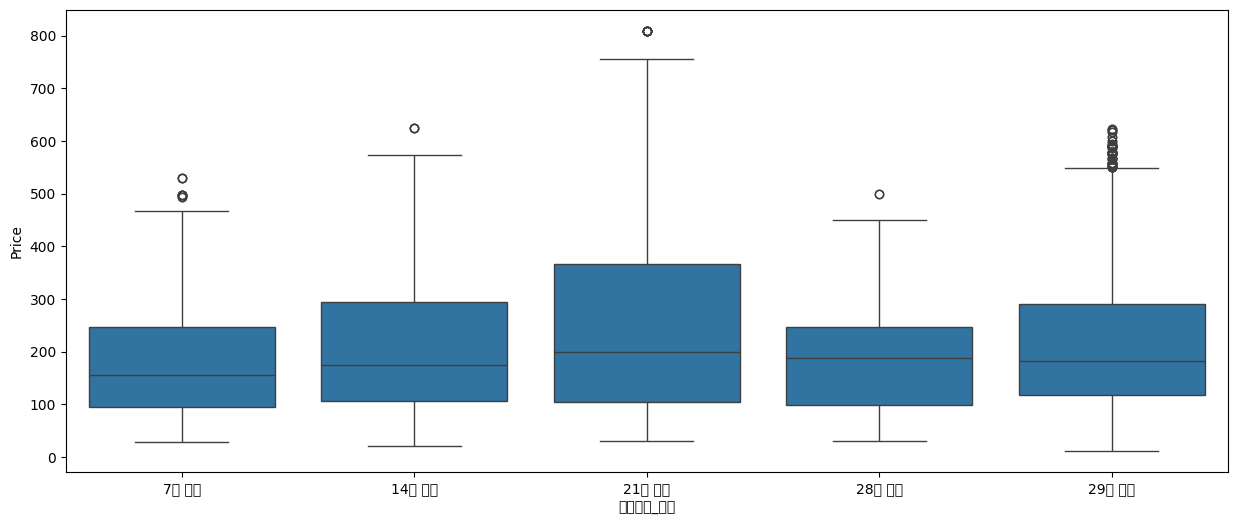

In [680]:
plt.figure(figsize=(15,6))
sns.boxplot(data=reorder_filtered_cleaned, x='구매주기_구간', y='Price')

In [ ]:
# 이상치를 제거해도 이상치가 뜬다. 왜 또 거기서 구하는거므로

In [681]:
re_df = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()

/tmp/ipykernel_96/1356318949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  re_df = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()


In [682]:
reorder_filtered_cleaned.Customer_unique_id.count() # 370개

3719

In [729]:
re_df

,구매주기_구간,Customer_unique_id
0,7일 이내,283
1,14일 이내,299
2,21일 이내,240
3,28일 이내,158
4,29일 이상,10978


In [684]:
sample_df["Customer_unique_id"].count()

8239

In [685]:
re_df[re_df.구매주기_구간=="29일 이상"].Customer_unique_id

4    2739
Name: Customer_unique_id, dtype: int64

In [686]:
sample_df["Customer_unique_id"].count()

8239

In [687]:
temp_sum = re_df[re_df.구매주기_구간=="29일 이상"]["Customer_unique_id"]+sample_df["Customer_unique_id"].count()

In [688]:
temp_sum

4    10978
Name: Customer_unique_id, dtype: int64

In [689]:
# 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df.loc[(re_df.구매주기_구간=="29일 이상"),"Customer_unique_id" ] = temp_sum

In [690]:
re_df

,구매주기_구간,Customer_unique_id
0,7일 이내,283
1,14일 이내,299
2,21일 이내,240
3,28일 이내,158
4,29일 이상,10978


In [706]:
## 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df2 = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['new_count', 'Freight_value', 'Price']].sum()
re_df2

/tmp/ipykernel_96/442011168.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  re_df2 = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['new_count', 'Freight_value', 'Price']].sum()


,구매주기_구간,new_count,Freight_value,Price
0,7일 이내,570.0,11971.53,52998.20
1,14일 이내,620.0,13487.24,64022.87
2,21일 이내,572.0,11372.13,63205.37
3,28일 이내,329.0,5936.92,30091.62
4,29일 이상,6011.0,122815.01,591850.14


In [696]:
# sample_df[sample_df.Customer_unique_id=="CUSTOMER_Unique_81692"]

In [695]:
# sample_df[sample_df.duplicated()]

In [707]:
# sample_df
sample_df_new_count_sum = sample_df['new_count'].sum()
sample_df_Freight_value_sum = sample_df['Freight_value'].sum()
sample_df_Price_sum = sample_df['Price'].sum()
print(sample_df_new_count_sum, sample_df_Freight_value_sum, sample_df_Price_sum)

8241.0 172114.47 1062111.6500000001


In [708]:
## 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"new_count"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["new_count"]+sample_df_new_count_sum

In [709]:
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"Freight_value"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["Freight_value"]+sample_df_Freight_value_sum

In [710]:
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"Price"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["Price"]+sample_df_Price_sum

In [711]:
re_df2

,구매주기_구간,new_count,Freight_value,Price
0,7일 이내,570.0,11971.53,52998.20
1,14일 이내,620.0,13487.24,64022.87
2,21일 이내,572.0,11372.13,63205.37
3,28일 이내,329.0,5936.92,30091.62
4,29일 이상,14252.0,294929.48,1653961.79


In [712]:
re_df3 = pd.merge(re_df, re_df2, on='구매주기_구간', how='inner')
re_df3

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price
0,7일 이내,283,570.0,11971.53,52998.20
1,14일 이내,299,620.0,13487.24,64022.87
2,21일 이내,240,572.0,11372.13,63205.37
3,28일 이내,158,329.0,5936.92,30091.62
4,29일 이상,10978,14252.0,294929.48,1653961.79


In [714]:
re_df3['Payment_value'] = re_df3['Freight_value'] + re_df3['Price']
re_df3['구매당순이익'] = round(re_df3['Price'] / re_df3['new_count'], 2)
re_df3['구매당운송비'] = round(re_df3['Freight_value'] / re_df3['new_count'], 2)
re_df3['고객당순이익'] = round(re_df3['Price'] / re_df3['Customer_unique_id'], 0)
re_df3['고객당구매수'] = round(re_df3['new_count'] / re_df3['Customer_unique_id'], 2)
re_df3['고객당매출액'] = round(re_df3['Payment_value'] / re_df3['Customer_unique_id'], 0)

In [716]:
re_df3

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,7일 이내,283,570.0,11971.53,52998.20,64969.73,92.98,21.00,187.0,2.01,230.0
1,14일 이내,299,620.0,13487.24,64022.87,77510.11,103.26,21.75,214.0,2.07,259.0
2,21일 이내,240,572.0,11372.13,63205.37,74577.50,110.50,19.88,263.0,2.38,311.0
3,28일 이내,158,329.0,5936.92,30091.62,36028.54,91.46,18.05,190.0,2.08,228.0
4,29일 이상,10978,14252.0,294929.48,1653961.79,1948891.27,116.05,20.69,151.0,1.30,178.0


In [ ]:
# 폰트없어서 안돼
# from matplotlib import font_manager, rc
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family=font_name)

/tmp/ipykernel_96/3075114023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
/tmp/ipykernel_96/3075114023.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
/tmp/ipykernel_96/3075114023.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
/tmp/ipykernel_96/3075114023.py:25: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
/tm

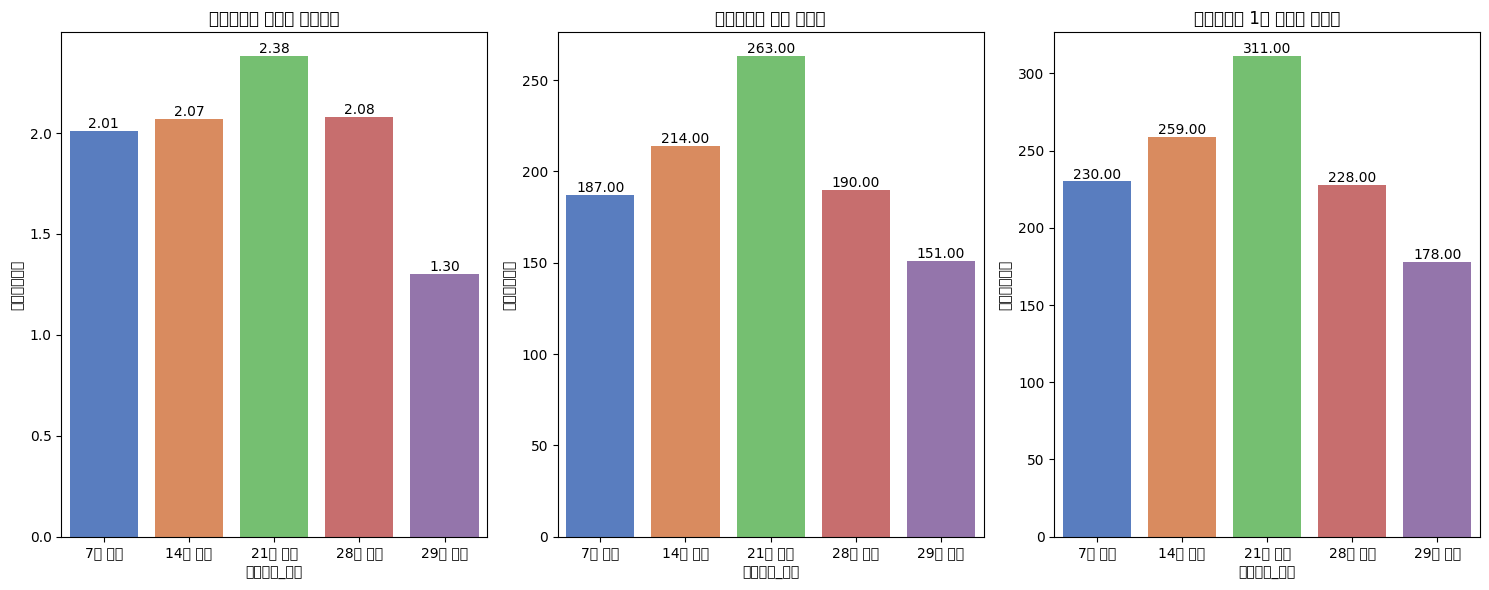

In [715]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 3, figsize=(15,6))

plt.subplot(1, 3, 1)
sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
plt.title('구매주기별 고객당 구매횟수')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 2)
sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
plt.title('구매주기별 인당 순수익')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 3)
sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
plt.title('구매주기별 1회 구매당 매출액')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [717]:
re_df3.sort_values(by='고객당순이익', ascending=False)

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
2,21일 이내,240,572.0,11372.13,63205.37,74577.50,110.50,19.88,263.0,2.38,311.0
1,14일 이내,299,620.0,13487.24,64022.87,77510.11,103.26,21.75,214.0,2.07,259.0
3,28일 이내,158,329.0,5936.92,30091.62,36028.54,91.46,18.05,190.0,2.08,228.0
0,7일 이내,283,570.0,11971.53,52998.20,64969.73,92.98,21.00,187.0,2.01,230.0
4,29일 이상,10978,14252.0,294929.48,1653961.79,1948891.27,116.05,20.69,151.0,1.30,178.0


In [718]:
reorder_yn

,재구매여부,new_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,86176.0,1878698.77,11478684.62,86176,0.955462,13357383.39,133.20,21.80,133.0,1.00,155.0
1,Y,8941.0,189716.34,1060169.15,4017,0.044538,1249885.49,118.57,21.22,264.0,2.23,311.0


In [719]:
reorder_filtered

,Customer_unique_id,Freight_value,Price,new_count,재구매여부,구매주기,구매주기_구간
4,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0,29일 이상
5,CUSTOMER_Unique_00004,59.36,506.52,2.0,Y,30.0,29일 이상
14,CUSTOMER_Unique_00012,32.53,248.97,2.0,Y,90.0,29일 이상
15,CUSTOMER_Unique_00012,32.53,248.97,2.0,Y,90.0,29일 이상
32,CUSTOMER_Unique_00030,38.85,74.98,2.0,Y,43.0,29일 이상
...,...,...,...,...,...,...,...
87719,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
87720,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
87721,CUSTOMER_Unique_82832,59.35,225.88,2.0,Y,5.0,7일 이내
88848,CUSTOMER_Unique_83936,30.52,114.90,2.0,Y,89.0,29일 이상


In [ ]:
# plt.figure(figsize=(15,6))
# sns.boxplot(data = reorder_filtered_cleaned, x="구매주기_구간", y="Price")
# # 이상치가 존재한다.

In [720]:
re_df3.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', axis=None)

,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
Customer_unique_id,1.000000,0.999965,0.999933,0.999937,0.999940,0.690906,0.175796,-0.675344,-0.933614,-0.724136
new_count,0.999965,1.000000,0.999989,0.999988,0.999992,0.696108,0.181601,-0.670600,-0.931835,-0.719469
Freight_value,0.999933,0.999989,1.000000,0.999969,0.999977,0.696643,0.185987,-0.670875,-0.932403,-0.719546
Price,0.999937,0.999988,0.999969,1.000000,0.999999,0.698912,0.180186,-0.667433,-0.930238,-0.716607
Payment_value,0.999940,0.999992,0.999977,0.999999,1.000000,0.698572,0.181061,-0.667954,-0.930568,-0.717053
구매당순이익,0.690906,0.696108,0.696643,0.698912,0.698572,1.000000,0.350669,0.046879,-0.426020,-0.015359
구매당운송비,0.175796,0.181601,0.185987,0.180186,0.181061,0.350669,1.000000,-0.050287,-0.224782,-0.022880
고객당순이익,-0.675344,-0.670600,-0.670875,-0.667433,-0.667954,0.046879,-0.050287,1.000000,0.883596,0.996667
고객당구매수,-0.933614,-0.931835,-0.932403,-0.930238,-0.930568,-0.426020,-0.224782,0.883596,1.000000,0.908870
고객당매출액,-0.724136,-0.719469,-0.719546,-0.716607,-0.717053,-0.015359,-0.022880,0.996667,0.908870,1.000000


In [ ]:
re_df3

In [721]:
# 구매주기_구간 인코딩
dummy_df = pd.get_dummies(re_df3['구매주기_구간'], prefix='구매주기_구간')

In [722]:
merged_df = pd.concat([re_df3, dummy_df], axis=1)

In [723]:
merged_df.columns

Index(['구매주기_구간', 'Customer_unique_id', 'new_count', 'Freight_value', 'Price',
       'Payment_value', '구매당순이익', '구매당운송비', '고객당순이익', '고객당구매수', '고객당매출액',
       '구매주기_구간_7일 이내', '구매주기_구간_14일 이내', '구매주기_구간_21일 이내', '구매주기_구간_28일 이내',
       '구매주기_구간_29일 이상'],
      dtype='object')

In [724]:
merged_drop_df = merged_df.drop(["구매주기_구간"],axis=1)

In [725]:
correlation_matrix = merged_drop_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', axis=None)

In [726]:
correlation_matrix

,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상
Customer_unique_id,1.000000,0.999965,0.999933,0.999937,0.999940,0.690906,0.175796,-0.675344,-0.933614,-0.724136,-0.245558,-0.243695,-0.250566,-0.260115,0.999935
new_count,0.999965,1.000000,0.999989,0.999988,0.999992,0.696108,0.181601,-0.670600,-0.931835,-0.719469,-0.245656,-0.241104,-0.245474,-0.267594,0.999829
Freight_value,0.999933,0.999989,1.000000,0.999969,0.999977,0.696643,0.185987,-0.670875,-0.932403,-0.719546,-0.244311,-0.237647,-0.246947,-0.270843,0.999748
Price,0.999937,0.999988,0.999969,1.000000,0.999999,0.698912,0.180186,-0.667433,-0.930238,-0.716607,-0.249628,-0.241024,-0.241662,-0.267505,0.999817
Payment_value,0.999940,0.999992,0.999977,0.999999,1.000000,0.698572,0.181061,-0.667954,-0.930568,-0.717053,-0.248827,-0.240516,-0.242459,-0.268009,0.999811
구매당순이익,0.690906,0.696108,0.696643,0.698912,0.698572,1.000000,0.350669,0.046879,-0.426020,-0.015359,-0.514465,0.021371,0.398749,-0.593693,0.688038
구매당운송비,0.175796,0.181601,0.185987,0.180186,0.181061,0.350669,1.000000,-0.050287,-0.224782,-0.022880,0.287334,0.584167,-0.155936,-0.880208,0.164643
고객당순이익,-0.675344,-0.670600,-0.670875,-0.667433,-0.667954,0.046879,-0.050287,1.000000,0.883596,0.996667,-0.189397,0.175868,0.838757,-0.148812,-0.676417
고객당구매수,-0.933614,-0.931835,-0.932403,-0.930238,-0.930568,-0.426020,-0.224782,0.883596,1.000000,0.908870,0.058666,0.142474,0.575482,0.156442,-0.933063
고객당매출액,-0.724136,-0.719469,-0.719546,-0.716607,-0.717053,-0.015359,-0.022880,0.996667,0.908870,1.000000,-0.128589,0.204365,0.801387,-0.151552,-0.725611


In [727]:
merged_df

,구매주기_구간,Customer_unique_id,new_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상
0,7일 이내,283,570.0,11971.53,52998.20,64969.73,92.98,21.00,187.0,2.01,230.0,True,False,False,False,False
1,14일 이내,299,620.0,13487.24,64022.87,77510.11,103.26,21.75,214.0,2.07,259.0,False,True,False,False,False
2,21일 이내,240,572.0,11372.13,63205.37,74577.50,110.50,19.88,263.0,2.38,311.0,False,False,True,False,False
3,28일 이내,158,329.0,5936.92,30091.62,36028.54,91.46,18.05,190.0,2.08,228.0,False,False,False,True,False
4,29일 이상,10978,14252.0,294929.48,1653961.79,1948891.27,116.05,20.69,151.0,1.30,178.0,False,False,False,False,True


In [728]:
import pickle

with open("./dacon_term2.pkl", "wb") as file:
    pickle.dump(re_df3, file)